# Wrangle and Analyze Data

## Introduction
>Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

>The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

>WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

## What Software Do I Need?
The entirety of this project can be completed inside the Udacity classroom on the Project Workspace: Complete and Submit Project page using the Jupyter Notebook provided there. (Note: This Project Workspace may not be available in all versions of this project, in which case you should follow the directions below.)

If you want to work outside of the Udacity classroom, the following software requirements apply:

>- You need to be able to work in a Jupyter Notebook on your computer. Please revisit our Jupyter Notebook and Anaconda tutorials earlier in the Nanodegree program for installation instructions.

>- The following packages (libraries) need to be installed. You can install these packages via conda or pip. Please revisit our Anaconda tutorial earlier in the Nanodegree program for package installation instructions.

>- pandas
>- NumPy
>- requests
>- tweepy
>- json

>- You need to be able to create written documents that contain images and you need to be able to export these documents as PDF files. This task can be done in a Jupyter Notebook, but you might prefer to use a word processor like Google Docs, which is free, or Microsoft Word.

>- A text editor, like Sublime, which is free, will be useful but is not required.

## Project Motivation
Context

Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

### The Data

### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

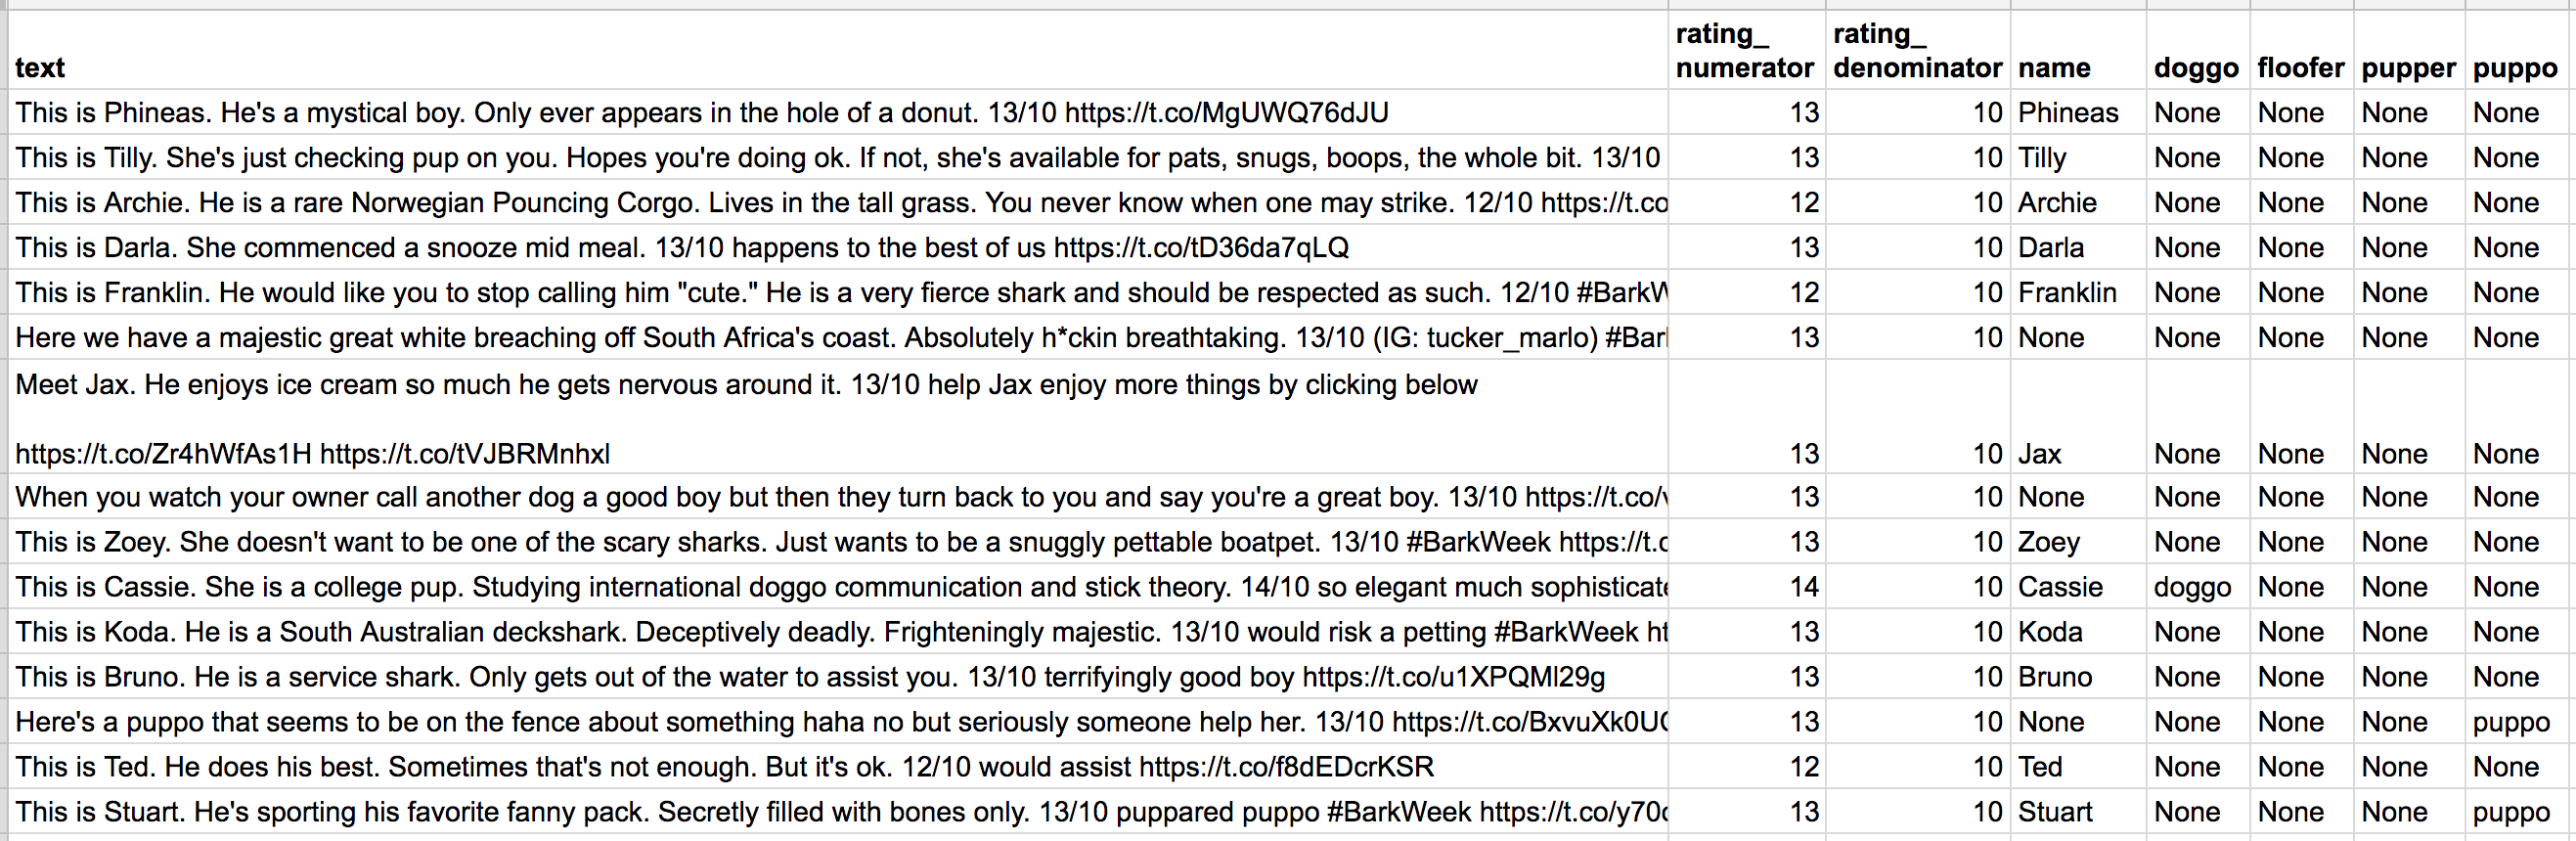

In [6]:
Image("picture01.png")

I extracted this data programmatically, but I didn't do a very good job. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages (see below for more information on these) too. You'll need to assess and clean these columns if you want to use them for analysis and visualization.

## Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.

## Image Predictions File

One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

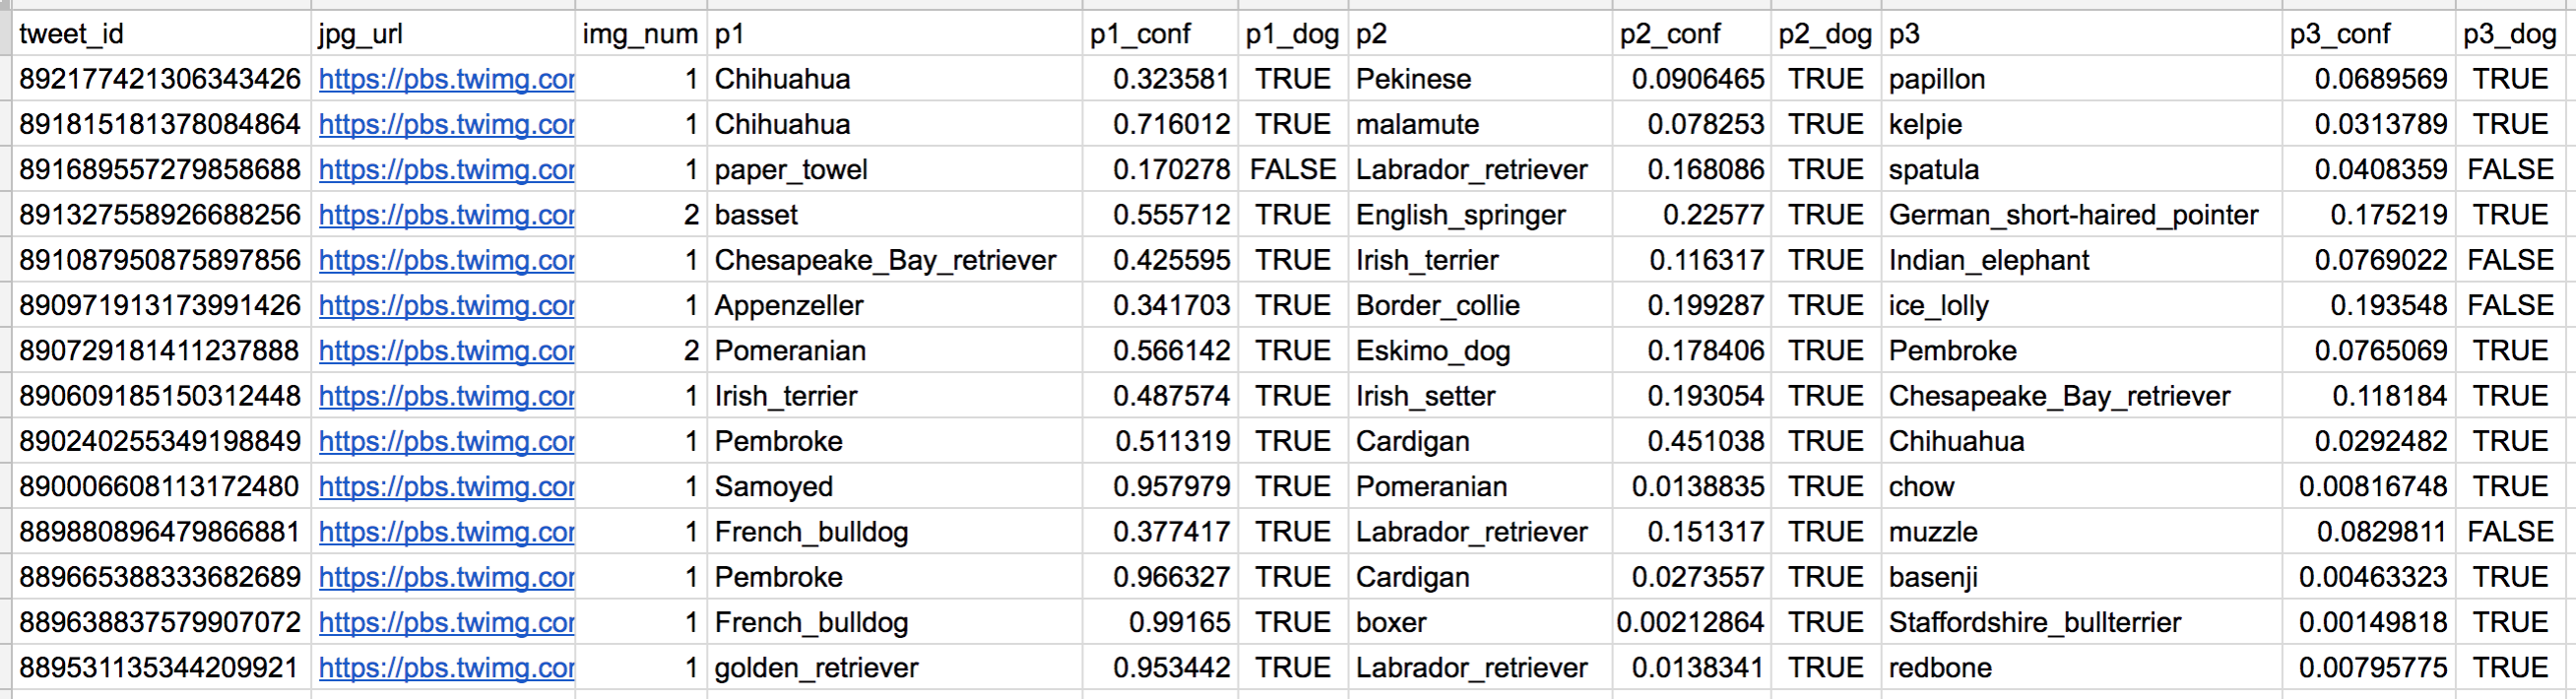

In [7]:
Image("picture02.png")

So for the last row in that table:

- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
- etc.

And the #1 prediction for the image in that tweet was spot on:

So that's all fun and good. But all of this additional data will need to be gathered, assessed, and cleaned. This is where you come in.

## Key Points

Key points to keep in mind when data wrangling for this project:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

- Cleaning includes merging individual pieces of data according to the rules of tidy data.

- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Project Details

Your tasks in this project are as follows:

- Data wrangling, which consists of:

>- Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).

>- Assessing data

>- Cleaning data

- Storing, analyzing, and visualizing your wrangled data

- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

In [1]:
# imports
from IPython.display import Image
import pandas as pd
import requests
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read csv
df_tw_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_tw_arch.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [4]:
response = requests.get(url)

In [5]:
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [6]:
df_image_pred = pd.read_csv('image-predictions.tsv', sep='\t' )
df_image_pred.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [19]:
# Reference:
'https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id'
'https://stackoverflow.com/questions/24002536/get-tweepy-search-results-as-json'

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [20]:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in df_tw_arch['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 4261
Rate limit reached. Sleeping for: 4224


In [21]:
print(len(list_of_tweets))
print(len(cant_find_tweets_for_those_ids))

2331
25


In [92]:
# Reference:
'https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api'

In [23]:
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [24]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [7]:
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        df_tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])

In [8]:
df_tweet_json.head(1)

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,34947,7333,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU


# Visual assessment

In [9]:
df_tw_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
df_tweet_json.head()

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,34947,7333,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30261,5473,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22773,3620,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38215,7521,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36485,8092,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3



# Programmatic assessment

In [12]:
df_tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_tw_arch.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
df_tw_arch.duplicated().sum()

0

In [15]:
df_tw_arch.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [16]:
df_tw_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [17]:
df_tw_arch.query('rating_numerator > 20')['tweet_id'].count()

24

In [18]:
df_tw_arch.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [19]:
pd.set_option('display.max_colwidth', -1)  
df_tw_arch.query('rating_denominator != 10')[['tweet_id', 'text', 'rating_denominator']]

,tweet_id,text,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
342,832088576586297345,@docmisterio account started on 11/15/15,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50


In [20]:
df_tw_arch.query('rating_denominator != 10')['tweet_id'].count()

23

In [21]:
df_tw_arch.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [22]:
df_tw_arch.name.value_counts()

None       745
a          55 
Charlie    12 
Cooper     11 
Lucy       11 
           .. 
Jaspers    1  
Jockson    1  
Eugene     1  
Tango      1  
Beebop     1  
Name: name, Length: 957, dtype: int64

In [23]:
df_image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
30,666418789513326592,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,1,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True
737,687109925361856513,https://pbs.twimg.com/media/CYka1NTWMAAOclP.jpg,2,borzoi,0.883086,True,whippet,0.022934,True,Saluki,0.021606,True
415,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,Pembroke,0.742320,True,Cardigan,0.084937,True,Eskimo_dog,0.068321,True
46,666804364988780544,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,1,English_setter,0.328792,True,Brittany_spaniel,0.283545,True,Ibizan_hound,0.057461,True
1038,712065007010385924,https://pbs.twimg.com/media/CeHDV73W0AM5Cf8.jpg,1,goose,0.214301,False,gibbon,0.084253,False,pizza,0.080168,False


In [24]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_image_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [26]:
df_image_pred['tweet_id'].duplicated().sum()

0

In [27]:
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
df_image_pred['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
bookcase              1  
lacewing              1  
EntleBucher           1  
prayer_rug            1  
lion                  1  
Name: p1, Length: 378, dtype: int64

In [29]:
df_image_pred['p2'].value_counts()

Labrador_retriever    104
golden_retriever      92 
Cardigan              73 
Chihuahua             44 
Pomeranian            42 
                      .. 
torch                 1  
sarong                1  
sandal                1  
otter                 1  
indri                 1  
Name: p2, Length: 405, dtype: int64

In [30]:
df_image_pred['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
pot                   1 
rain_barrel           1 
conch                 1 
shoji                 1 
Indian_elephant       1 
Name: p3, Length: 408, dtype: int64

In [31]:
df_tweet_json.head()

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,34947,7333,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30261,5473,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22773,3620,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38215,7521,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36485,8092,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [32]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   created_at        2331 non-null   object
 4   source            2331 non-null   object
 5   retweeted_status  2331 non-null   object
 6   url               2331 non-null   object
dtypes: int64(2), object(5)
memory usage: 127.6+ KB


In [33]:
df_tweet_json.query('retweeted_status == "Original tweet"')['tweet_id'].count()

2168

In [34]:
df_tweet_json.describe()

,favorite_count,retweet_count
count,2331.000000,2331.000000
mean,7296.523381,2581.535822
std,11334.084549,4366.448623
min,0.000000,1.000000
25%,1262.000000,524.000000
50%,3161.000000,1204.000000
75%,8920.500000,2987.000000
max,150139.000000,74081.000000


## Quality issues

### Twitter archive

>- Align data types between data frame (tweet_id)
>- Change dates to the same formats
>- Drop unnecessary columns
>- Keep only original tweets
>- Correct or drop rating_denominator
>- Correct or drop rating_numerator
>- Drop rows without proper dog names

###  Image prediction

>- Only keep predictions with the highest confidence level
>- Correct prediction names


###  Tweet json

>- Keep only original tweets

## Tidiness issues

>- Merge Three datadrames into one using Tweet_id
>- Merge Dog stages into one column

# Clean

In [104]:
# Copy data
df_tw_arch_clean = df_tw_arch.copy()
df_image_pred_clean = df_image_pred.copy()
df_tweet_json_clean = df_tweet_json.copy()

#### Align data types between data frame (tweet_id)

##### Define: change all 'tweet_id' columns in al dataframes to str

##### Code:

In [105]:
# tweet_id to str
df_tw_arch_clean['tweet_id'] = df_tw_arch_clean['tweet_id'].astype(str)
df_image_pred_clean['tweet_id'] = df_image_pred_clean['tweet_id'].astype(str)
df_tweet_json_clean['tweet_id'] = df_tweet_json_clean['tweet_id'].astype(str)

##### Test:

In [106]:
#test
df_tw_arch_clean.tweet_id.dtypes

dtype('O')

In [107]:
#test
df_image_pred_clean.tweet_id.dtypes

dtype('O')

In [108]:
#test
df_tweet_json_clean.tweet_id.dtypes

dtype('O')

#### Merge Three dataframes into one using Tweet_id

##### Define: Merge dataframes

##### Code:

In [109]:
# merge df
df_clean = pd.merge(df_tw_arch_clean, 
                      df_image_pred_clean, 
                      how = 'left', on = ['tweet_id'])

In [110]:
# merge df
df_clean = pd.merge(df_clean, 
                      df_tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

##### Test:

In [111]:
# TEST
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,source_y,retweeted_status,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,banana,0.07611,False,34947.0,7333.0,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU


#### Drop unnecessary columns

#### Only keep predictions with the highest confidence level

##### Define: Drop unnecessary columns using drop method

##### Define: Drop columns with low confidence level (p2, p3)

##### Code:

In [112]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source_x', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count',
       'created_at', 'source_y', 'retweeted_status', 'url'],
      dtype='object')

In [113]:
# drop columns
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at'], axis=1, inplace=True)

In [114]:
list(df_clean)

['tweet_id',
 'timestamp',
 'source_x',
 'text',
 'retweeted_status_id',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'favorite_count',
 'retweet_count',
 'source_y',
 'retweeted_status',
 'url']

##### Test:

In [115]:
# Test
df_clean.head(1)

,tweet_id,timestamp,source_x,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,...,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count,source_y,retweeted_status,url
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,13,10,Phineas,None,None,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,34947.0,7333.0,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU


In [116]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2356 non-null   object 
 1   timestamp            2356 non-null   object 
 2   source_x             2356 non-null   object 
 3   text                 2356 non-null   object 
 4   retweeted_status_id  181 non-null    float64
 5   rating_numerator     2356 non-null   int64  
 6   rating_denominator   2356 non-null   int64  
 7   name                 2356 non-null   object 
 8   doggo                2356 non-null   object 
 9   floofer              2356 non-null   object 
 10  pupper               2356 non-null   object 
 11  puppo                2356 non-null   object 
 12  jpg_url              2075 non-null   object 
 13  img_num              2075 non-null   float64
 14  p1                   2075 non-null   object 
 15  p1_conf              2075 non-null   f

In [117]:
df_clean.shape

(2356, 22)

#### Drop rows without proper dog names

##### Define: Find and drop incorect names - droped all rows with lowercase names

##### Code:

In [118]:
# droping records with lowercase names as sugested by the reviewer
lower_dog_name_index = df_clean[df_clean.name.str.islower()].index

##### Test:

In [119]:
# TEST
df_clean[df_clean.name.str.islower()]['name'].value_counts()

a               55
the             8 
an              7 
very            5 
one             4 
quite           4 
just            4 
mad             2 
not             2 
actually        2 
getting         2 
my              1 
incredibly      1 
this            1 
old             1 
officially      1 
life            1 
by              1 
his             1 
infuriating     1 
all             1 
unacceptable    1 
such            1 
space           1 
light           1 
Name: name, dtype: int64

In [120]:
df_clean.drop(lower_dog_name_index, inplace=True)

In [121]:
# TEST
df_clean.shape

(2247, 22)

In [122]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2247 non-null   object 
 1   timestamp            2247 non-null   object 
 2   source_x             2247 non-null   object 
 3   text                 2247 non-null   object 
 4   retweeted_status_id  176 non-null    float64
 5   rating_numerator     2247 non-null   int64  
 6   rating_denominator   2247 non-null   int64  
 7   name                 2247 non-null   object 
 8   doggo                2247 non-null   object 
 9   floofer              2247 non-null   object 
 10  pupper               2247 non-null   object 
 11  puppo                2247 non-null   object 
 12  jpg_url              1975 non-null   object 
 13  img_num              1975 non-null   float64
 14  p1                   1975 non-null   object 
 15  p1_conf              1975 non-null   f

#### Keep only original tweets

##### Define: Drop all unoriginal tweets - droping rows with 'retweeted status' == 'This is a retweet'

##### Code:

In [123]:
df_clean.query('retweeted_status == "This is a retweet"').retweeted_status.count()

159

In [124]:
df_clean.retweeted_status_id.count()

176

In [125]:
# drop retweets
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]

##### Test:

In [126]:
# TEST
df_clean.query('retweeted_status == "This is a retweet"').retweeted_status.count()

0

In [127]:
df_clean.drop(['retweeted_status', 'retweeted_status_id'], axis=1, inplace=True)

In [128]:
list(df_clean)

['tweet_id',
 'timestamp',
 'source_x',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'favorite_count',
 'retweet_count',
 'source_y',
 'url']

In [129]:
df_clean.tweet_id.count()

2071

#### Merge Dog stages into one column

##### Define: Merge columns: 'doggo', 'floofer', 'pupper', 'puppo' into one column. Some dogs have two stages in that case keep both stages and divide them by a comma.

##### Code:

In [130]:
# handle none
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

# merge into column
df_clean['dog_stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

In [131]:
# TEST
df_clean.dog_stage.value_counts()

                1741
pupper          213 
doggo           73  
puppo           24  
floofer         9   
doggopupper     9   
doggofloofer    1   
doggopuppo      1   
Name: dog_stage, dtype: int64

In [132]:
# handle multiple stages
df_clean.loc[df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_clean.loc[df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_clean.loc[df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df_clean.loc[df_clean.dog_stage == '', 'dog_stage'] = np.nan

In [133]:
df_clean.drop(['doggo',
 'floofer',
 'pupper',
 'puppo',], axis=1, inplace=True)

##### Test:

In [134]:
list(df_clean.columns)

['tweet_id',
 'timestamp',
 'source_x',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'favorite_count',
 'retweet_count',
 'source_y',
 'url',
 'dog_stage']

In [135]:
df_clean.dog_stage.value_counts()

pupper            213
doggo             73 
puppo             24 
floofer           9  
doggo, pupper     9  
doggo, puppo      1  
doggo, floofer    1  
Name: dog_stage, dtype: int64

In [136]:
df_clean.tweet_id.count()

2071

#### Correct or drop rating_denominator

#### Correct or drop rating_numerator

##### Define: Correct rating_denominator and  rating_numerator by extracting values from 'text' column. If possible programmatically if not manually. 

##### Code:

In [137]:
rating = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
rating.astype(float)

,rating_numerator,rating_denominator
0,13.0,10.0
1,13.0,10.0
2,12.0,10.0
3,13.0,10.0
4,12.0,10.0
...,...,...
2342,6.0,10.0
2343,10.0,10.0
2344,9.0,10.0
2351,5.0,10.0


In [138]:
df_clean['rating_numerator'] = rating['rating_numerator']
df_clean['rating_denominator'] = rating['rating_denominator']

In [139]:
df_clean.rating_numerator = df_clean.rating_numerator.astype(float)
df_clean.rating_denominator = df_clean.rating_denominator.astype(float)

In [140]:
df_clean.sample()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count,source_y,url,dog_stage
1512,691321916024623104,2016-01-24 18:09:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Molly. She's a Peruvian Niddlewog. Loves her new hat. 11/10 would totally pet https://t.co/g4fiS8A9Ab,11.0,10.0,Molly,https://pbs.twimg.com/media/CZgRmk0UcAAxeuQ.jpg,1.0,Rottweiler,0.508981,True,2480.0,630.0,Twitter for iPhone,https://t.co/g4fiS8A9Ab,NaN


In [141]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2071 non-null   object 
 1   timestamp           2071 non-null   object 
 2   source_x            2071 non-null   object 
 3   text                2071 non-null   object 
 4   rating_numerator    2071 non-null   float64
 5   rating_denominator  2071 non-null   float64
 6   name                2071 non-null   object 
 7   jpg_url             1896 non-null   object 
 8   img_num             1896 non-null   float64
 9   p1                  1896 non-null   object 
 10  p1_conf             1896 non-null   float64
 11  p1_dog              1896 non-null   object 
 12  favorite_count      2064 non-null   float64
 13  retweet_count       2064 non-null   float64
 14  source_y            2064 non-null   object 
 15  url                 2064 non-null   object 
 16  dog_st

In [142]:
# TEST
df_clean.rating_denominator.value_counts()

10.0     2052
50.0     2   
20.0     2   
80.0     2   
11.0     2   
0.0      1   
15.0     1   
70.0     1   
130.0    1   
120.0    1   
150.0    1   
90.0     1   
16.0     1   
40.0     1   
110.0    1   
7.0      1   
Name: rating_denominator, dtype: int64

In [143]:
# TEST
df_clean.rating_numerator.value_counts()

12.00      485
10.00      419
11.00      410
13.00      300
9.00       142
8.00       91 
7.00       48 
14.00      39 
5.00       33 
6.00       30 
3.00       18 
4.00       14 
1.00       7  
2.00       7  
0.00       2  
420.00     2  
84.00      1  
165.00     1  
182.00     1  
88.00      1  
99.00      1  
9.50       1  
1776.00    1  
17.00      1  
13.50      1  
11.27      1  
80.00      1  
15.00      1  
20.00      1  
144.00     1  
121.00     1  
11.26      1  
50.00      1  
960.00     1  
9.75       1  
45.00      1  
24.00      1  
666.00     1  
44.00      1  
143.00     1  
Name: rating_numerator, dtype: int64

In [144]:
# set rating denominator to 10 if it was 0
df_clean.loc[(df_clean.rating_denominator == 0), 'rating_denominator'] = 10

In [145]:
df_clean.rating_denominator.value_counts()

10.0     2053
50.0     2   
20.0     2   
80.0     2   
11.0     2   
15.0     1   
70.0     1   
130.0    1   
120.0    1   
150.0    1   
90.0     1   
16.0     1   
40.0     1   
110.0    1   
7.0      1   
Name: rating_denominator, dtype: int64

In [146]:
pd.set_option('display.max_colwidth', -1)  
df_clean.query('rating_numerator > 20')[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.0,10.0
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0,10.0
290,838150277551247360,@markhoppus 182/10,182.0,10.0
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,10.0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0


In [147]:
# Manually changing ratings based on text when info exists - those seem, to be multiple dogs in one picture

In [148]:
df_clean.loc[(df_clean.tweet_id == '697463031882764288'), 'rating_numerator'] = 11
df_clean.loc[(df_clean.tweet_id == '684222868335505415'), 'rating_numerator'] = 11
df_clean.loc[(df_clean.tweet_id == '684225744407494656'), 'rating_numerator'] = 11
df_clean.loc[(df_clean.tweet_id == '710658690886586372'), 'rating_numerator'] = 10
df_clean.loc[(df_clean.tweet_id == '713900603437621249'), 'rating_numerator'] = 11
df_clean.loc[(df_clean.tweet_id == '709198395643068416'), 'rating_numerator'] = 9
df_clean.loc[(df_clean.tweet_id == '716439118184652801'), 'rating_numerator'] = 11
df_clean.loc[(df_clean.tweet_id == '704054845121142784'), 'rating_numerator'] = 12
df_clean.loc[(df_clean.tweet_id == '677716515794329600'), 'rating_numerator'] = 12
df_clean.loc[(df_clean.tweet_id == '675853064436391936'), 'rating_numerator'] = 11
df_clean.loc[(df_clean.tweet_id == '820690176645140481'), 'rating_numerator'] = 12
df_clean.loc[(df_clean.tweet_id == '835246439529840640'), 'rating_numerator'] = 13
df_clean.loc[(df_clean.tweet_id == '758467244762497024'), 'rating_numerator'] = 11
df_clean.loc[(df_clean.tweet_id == '731156023742988288'), 'rating_numerator'] = 12

In [149]:
df_clean.loc[(df_clean.tweet_id == '697463031882764288'), 'rating_denominator'] = 10
df_clean.loc[(df_clean.tweet_id == '684222868335505415'), 'rating_denominator'] = 10
df_clean.loc[(df_clean.tweet_id == '684225744407494656'), 'rating_denominator'] = 10
df_clean.loc[(df_clean.tweet_id == '710658690886586372'), 'rating_denominator'] = 10
df_clean.loc[(df_clean.tweet_id == '713900603437621249'), 'rating_denominator'] = 10
df_clean.loc[(df_clean.tweet_id == '709198395643068416'), 'rating_denominator'] = 10
df_clean.loc[(df_clean.tweet_id == '716439118184652801'), 'rating_denominator'] = 10
df_clean.loc[(df_clean.tweet_id == '704054845121142784'), 'rating_denominator'] = 10
df_clean.loc[(df_clean.tweet_id == '677716515794329600'), 'rating_denominator'] = 10
df_clean.loc[(df_clean.tweet_id == '675853064436391936'), 'rating_denominator'] = 10
df_clean.loc[(df_clean.tweet_id == '820690176645140481'), 'rating_denominator'] = 10
df_clean.loc[(df_clean.tweet_id == '835246439529840640'), 'rating_denominator'] = 10
df_clean.loc[(df_clean.tweet_id == '758467244762497024'), 'rating_denominator'] = 10
df_clean.loc[(df_clean.tweet_id == '731156023742988288'), 'rating_denominator'] = 10

In [150]:
# Those dogs seem to have very high ratings !! :)
pd.set_option('display.max_colwidth', -1)  
df_clean.query('rating_numerator > 20')[['tweet_id', 'text', 'rating_numerator']]

,tweet_id,text,rating_numerator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.0
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0
290,838150277551247360,@markhoppus 182/10,182.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0
2074,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0


In [151]:
# drop rows with unclear rating numerator
df_clean = df_clean[~(df_clean.tweet_id.isin(['810984652412424192']))]

##### Test:

In [152]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2070 non-null   object 
 1   timestamp           2070 non-null   object 
 2   source_x            2070 non-null   object 
 3   text                2070 non-null   object 
 4   rating_numerator    2070 non-null   float64
 5   rating_denominator  2070 non-null   float64
 6   name                2070 non-null   object 
 7   jpg_url             1895 non-null   object 
 8   img_num             1895 non-null   float64
 9   p1                  1895 non-null   object 
 10  p1_conf             1895 non-null   float64
 11  p1_dog              1895 non-null   object 
 12  favorite_count      2063 non-null   float64
 13  retweet_count       2063 non-null   float64
 14  source_y            2063 non-null   object 
 15  url                 2063 non-null   object 
 16  dog_st

In [153]:
df_clean.sample(5)

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count,source_y,url,dog_stage
862,762699858130116608,2016-08-08 17:19:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Leela. She's a Fetty Woof. Lost eye while saving a baby from an avalanche. 11/10 true h*ckin hero https://t.co/2lBg3ZgivD,11.0,10.0,Leela,https://pbs.twimg.com/media/CpWnecZWIAAUFwt.jpg,1.0,kelpie,0.519047,True,11780.0,3477.0,Twitter for iPhone,https://t.co/2lBg3ZgivD,NaN
1507,691675652215414786,2016-01-25 17:35:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Richie and Plip. They are the best of pals. Do everything together. 10/10 for both https://t.co/KMdwNgONkV,10.0,10.0,Richie,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,1.0,Chihuahua,0.182898,True,1875.0,483.0,Twitter for iPhone,https://t.co/KMdwNgONkV,NaN
1985,672898206762672129,2015-12-04 22:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cheryl AKA Queen Pupper of the Skies. Experienced fighter pilot. Much skill. True hero. 11/10 https://t.co/i4XJEWwdsp,11.0,10.0,Cheryl,https://pbs.twimg.com/media/CVadWcCXIAAL4Sh.jpg,1.0,motor_scooter,0.835819,False,841.0,387.0,Twitter for iPhone,https://t.co/i4XJEWwdsp,pupper
2303,666996132027977728,2015-11-18 15:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Carll. He wants to be a donkey. But also a soccer star. Dreams big. 10/10 https://t.co/SVpNbhaIMk,10.0,10.0,Carll,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1.0,hay,0.507637,False,222.0,80.0,Twitter for iPhone,https://t.co/SVpNbhaIMk,NaN
2199,668779399630725120,2015-11-23 13:13:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kevon. He is not physically or mentally prepared to start his Monday. 10/10 totes relatable https://t.co/YVAJgWHzPW,10.0,10.0,Kevon,https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg,1.0,Chesapeake_Bay_retriever,0.285508,True,661.0,341.0,Twitter for iPhone,https://t.co/YVAJgWHzPW,NaN


#### Correct prediction names

##### Define: Remove underscore from prediction names and make the names upper case

##### Code:

In [154]:
df_clean.p1.value_counts()

golden_retriever      134
Labrador_retriever    92 
Pembroke              84 
Chihuahua             77 
pug                   51 
                      .. 
clumber               1  
orange                1  
grey_fox              1  
flamingo              1  
walking_stick         1  
Name: p1, Length: 362, dtype: int64

In [155]:
# clean dog species names
df_clean.p1 = df_clean.p1.str.replace('_', ' ')
df_clean.p1 = df_clean.p1.str.title()

##### Test:

In [156]:
#TEST
df_clean.p1.value_counts()

Golden Retriever      134
Labrador Retriever    92 
Pembroke              84 
Chihuahua             77 
Pug                   51 
                      .. 
Candle                1  
Grey Fox              1  
Ocarina               1  
Rapeseed              1  
Radio Telescope       1  
Name: p1, Length: 362, dtype: int64

In [157]:
# TEST
df_clean.p1.sample(5)

26      Chihuahua                  
2303    Hay                        
632     Labrador Retriever         
1419    Boxer                      
2158    West Highland White Terrier
Name: p1, dtype: object

In [158]:
df_clean.head(1)

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count,source_y,url,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,34947.0,7333.0,Twitter for iPhone,https://t.co/MgUWQ76dJU,NaN


#### Change dates to the same formats

##### Define: Clean date format for timestamp column

##### Code:

In [159]:
# change timestamp to datetime format
df_clean.timestamp = pd.to_datetime(df_clean['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

##### Test:

In [160]:
# TEST
df_clean.head()

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count,source_y,url,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,34947.0,7333.0,Twitter for iPhone,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,30261.0,5473.0,Twitter for iPhone,https://t.co/aQFSeaCu9L,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,22773.0,3620.0,Twitter for iPhone,https://t.co/r0YlrsGCgy,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper Towel,0.170278,False,38215.0,7521.0,Twitter for iPhone,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,36485.0,8092.0,Twitter for iPhone,https://t.co/0g0KMIVXZ3,NaN


# Storing, Analyzing, and Visualizing Data for this Project

In [161]:
df_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## What is the most popular dog species?

In [162]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2070 non-null   object             
 1   timestamp           2070 non-null   datetime64[ns, UTC]
 2   source_x            2070 non-null   object             
 3   text                2070 non-null   object             
 4   rating_numerator    2070 non-null   float64            
 5   rating_denominator  2070 non-null   float64            
 6   name                2070 non-null   object             
 7   jpg_url             1895 non-null   object             
 8   img_num             1895 non-null   float64            
 9   p1                  1895 non-null   object             
 10  p1_conf             1895 non-null   float64            
 11  p1_dog              1895 non-null   object             
 12  favorite_count      2063 non-null 

In [163]:
df_clean.p1.value_counts()

Golden Retriever      134
Labrador Retriever    92 
Pembroke              84 
Chihuahua             77 
Pug                   51 
                      .. 
Candle                1  
Grey Fox              1  
Ocarina               1  
Rapeseed              1  
Radio Telescope       1  
Name: p1, Length: 362, dtype: int64

In [164]:
popular_species = df_clean.groupby('p1').filter(lambda x: len(x) >= 20)

Text(0, 0.5, 'Species')

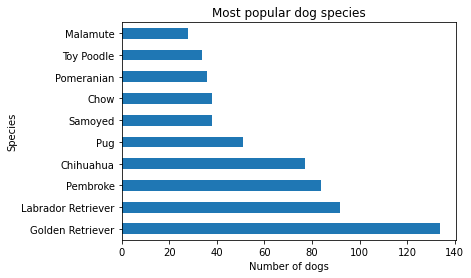

In [165]:
popular_species['p1'].value_counts()[0:10].plot(kind = 'barh')

plt.title('Most popular dog species')
plt.xlabel('Number of dogs')
plt.ylabel('Species')

### The most popular dog species is Golden Retriever

## Which dog species received the highest favorite count?

In [166]:
df_clean.loc[df_clean['favorite_count'] == df_clean.favorite_count.max(), 'p1'].iloc[0]

'Labrador Retriever'

In [167]:
df_clean.loc[df_clean['favorite_count'] == df_clean.favorite_count.max(), 'jpg_url'].iloc[0]

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

Text(0, 0.5, 'Species')

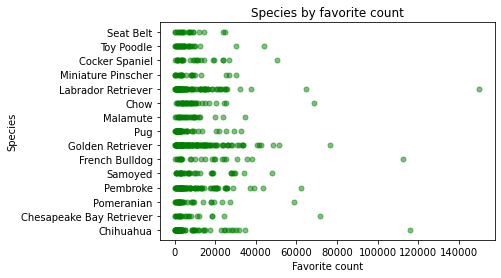

In [168]:
popular_species.plot(kind='scatter', x='favorite_count', y='p1', c='green', s=25, alpha = 0.5);
plt.title('Species by favorite count')
plt.xlabel('Favorite count')
plt.ylabel('Species')

### Labrador Retriever received the highest favorite count

## Is there a relation between 'favorite_count' and 'retweet_count'?

Text(0, 0.5, 'Retweet count')

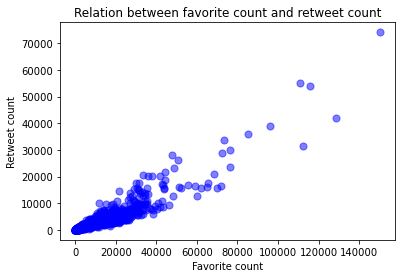

In [169]:
df_clean.plot(kind='scatter', x='favorite_count', y='retweet_count', c='blue', s=50, alpha = 0.5);
plt.title('Relation between favorite count and retweet count')
plt.xlabel('Favorite count')
plt.ylabel('Retweet count')

### As we can see from the graph above there is a positive relationship between 'favorite_count' and 'retweet_count'. The higher the 'favorite_count' the higher the 'retweet_count'